<a href="https://colab.research.google.com/github/NaraaBold/DiverNaraa/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation of Linear Regression (LR) in scratch

[Problem 1] Hypothetical function

[Question 2] The most rapid descent method

[Question 3] Presumption

[Question 3] Presumption

[Problem 4] Mean square error

[Problem 5] Objective function


In [104]:
import numpy as np

class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.num_iter)
        self.val_loss = np.zeros(self.num_iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Learn linear regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        #print (X_val)
        if self.bias == True:
          bias = np.ones((X.shape[0], 1))
          X = np.hstack((bias, X))
          if X_val is not None:
            bias = np.ones((X_val.shape[0], 1))
            X_val = np.hstack((bias, X_val))
        self.theta = np.zeros(X.shape[1])
        self.theta = self.theta.reshape(X.shape[1], 1)
        for i in range(self.num_iter):
          pred = self._linear_hypothesis(X)
          self._gradient_descent(X, y)
          loss = self._loss_func(pred, y)
          self.loss[i] = loss
          if X_val is not None:
            pred_val = self._linear_hypothesis(X_val)
            loss_val = self._loss_func(pred_val, y_val)
            self.val_loss[i] = loss_val
          if self.verbose == True:
            print('{}回目の学習の損失は{}'.format(i,loss))
        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Estimate using linear regression.
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if self.bias == True:
          bias = np.ones(X.shape[0]).reshape(X.shape[0], 1)
          X = np.hstack([bias, X])
        pred_y = self._linear_hypothesis(X)
        return pred_y

    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        訓練データ

        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果

        """
        pred = X @ self.theta
        return pred
    
    def _gradient_descent(self, X, y):
        """
        説明を記述
        """
        m = X.shape[0]
        n = X.shape[1]
        pred = self._linear_hypothesis(X)
        for j in range(n):
            gradient = 0
            for i in range(m):
                gradient += (pred[i] - y[i]) * X[i, j]
            self.theta[j] = self.theta[j] - self.lr * (gradient / m)

            
    def MSE(self, y_pred, y):
        """
        平均二乗誤差の計算

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
        mse = ((y_pred - y) ** 2).sum() / X.shape[0]
        return mse

    def _loss_func(self, pred, y):
        """
        損失関数
        """
        loss = self.MSE(pred, y)/2
        return loss

[Problem 6] Learning and estimation

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
dataset = pd.read_csv("train.csv")
X = dataset.loc[:, ['GrLivArea', 'YearBuilt']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

scaler = StandardScaler()
scaler.fit(X_train)
#transform both X_train and X_test
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

# LR in scratch
slr = ScratchLinearRegression(num_iter=100, lr=0.01, bias=True, verbose=True)
slr.fit(X_train, y_train, X_test, y_test)

0回目の学習の損失は15631866141.842808
1回目の学習の損失は15329990501.38157
2回目の学習の損失は15034290351.503935
3回目の学習の損失は14744638721.434423
4回目の学習の損失は14460911265.69552
5回目の学習の損失は14182986209.48682
6回目の学習の損失は13910744295.208315
7回目の学習の損失は13644068730.103807
8回目の学習の損失は13382845135.000725
9回目の学習の損失は13126961494.123226
10回目の学習の損失は12876308105.95599
11回目の学習の損失は12630777535.136497
12回目の学習の損失は12390264565.354105
13回目の学習の損失は12154666153.234734
14回目の学習の損失は11923881383.190382
15回目の学習の損失は11697811423.213072
16回目の学習の損失は11476359481.593426
17回目の学習の損失は11259430764.5443
18回目の学習の損失は11046932434.710478
19回目の学習の損失は10838773570.545742
20回目の学習の損失は10634865126.539019
21回目の学習の損失は10435119894.271791
22回目の学習の損失は10239452464.28924
23回目の学習の損失は10047779188.767963
24回目の学習の損失は9860018144.963575
25回目の学習の損失は9676089099.421728
26回目の学習の損失は9495913472.936499
27回目の学習の損失は9319414306.240458
28回目の学習の損失は9146516226.410982
29回目の学習の損失は8977145413.977797
30回目の学習の損失は8811229570.716984
31回目の学習の損失は8648697888.117023
32回目の学習の損失は8489481016.502761
33回目の学習の損失は8333511034.803465
34回目の学習

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#LR in scratch
reg_scratch = ScratchLinearRegression(num_iter=100, lr=0.01, bias=True, verbose=True)
reg_scratch.fit(X_train, y_train)
prediction_reg_scratch = reg_scratch.predict(X_test)


# LR in scikit-learn
reg = LinearRegression().fit(X_train, y_train)
prediction_reg = reg.predict(X_test)

# Evaluation using MSE
mse_reg_scratch = mean_squared_error(y_test, prediction_reg_scratch)
print ("MSE of ScratchLR: " + str(mse_reg_scratch))

mse_reg = mean_squared_error(y_test, prediction_reg)
print ("MSE of LR: " + str(mse_reg))

0回目の学習の損失は15631866141.842808
1回目の学習の損失は15329990501.38157
2回目の学習の損失は15034290351.503935
3回目の学習の損失は14744638721.434423
4回目の学習の損失は14460911265.69552
5回目の学習の損失は14182986209.48682
6回目の学習の損失は13910744295.208315
7回目の学習の損失は13644068730.103807
8回目の学習の損失は13382845135.000725
9回目の学習の損失は13126961494.123226
10回目の学習の損失は12876308105.95599
11回目の学習の損失は12630777535.136497
12回目の学習の損失は12390264565.354105
13回目の学習の損失は12154666153.234734
14回目の学習の損失は11923881383.190382
15回目の学習の損失は11697811423.213072
16回目の学習の損失は11476359481.593426
17回目の学習の損失は11259430764.5443
18回目の学習の損失は11046932434.710478
19回目の学習の損失は10838773570.545742
20回目の学習の損失は10634865126.539019
21回目の学習の損失は10435119894.271791
22回目の学習の損失は10239452464.28924
23回目の学習の損失は10047779188.767963
24回目の学習の損失は9860018144.963575
25回目の学習の損失は9676089099.421728
26回目の学習の損失は9495913472.936499
27回目の学習の損失は9319414306.240458
28回目の学習の損失は9146516226.410982
29回目の学習の損失は8977145413.977797
30回目の学習の損失は8811229570.716984
31回目の学習の損失は8648697888.117023
32回目の学習の損失は8489481016.502761
33回目の学習の損失は8333511034.803465
34回目の学習

[Problem 7] Plot of learning curve

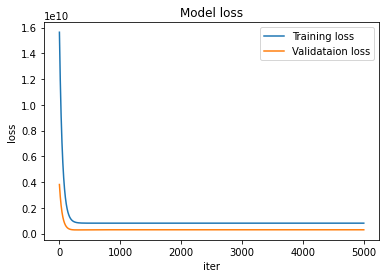

In [66]:
import matplotlib.pyplot as plt

# LR in scratch
slr2 = ScratchLinearRegression(num_iter=5000, lr=0.01, bias=True, verbose=False)
slr2.fit(X_train, y_train, X_test, y_test)

loss = slr2.loss
val_loss = slr2.val_loss

plt.plot(loss, label = 'Training loss')
plt.plot(val_loss, label = 'Validataion loss')
plt.legend()
plt.xlabel ('iter')
plt.ylabel ('loss')
plt.title ('Model loss')
plt.show()


[Problem 8] (Advance task) Removal of bias term

In [69]:
# LR in scratch
slr3 = ScratchLinearRegression(num_iter=100, lr=0.01, bias=False, verbose=True)
slr3.fit(X_train, y_train)
prediction_no_bias = slr3.predict(X_test)

mse_reg_no_bias = mean_squared_error(y_test, prediction_no_bias)
print ("MSE of LR with no bias term: " + str(mse_reg_no_bias))
print ("MSE of LR with with bias term: " + str(mse_reg_scratch))


0回目の学習の損失は15631866141.842808
1回目の学習の損失は15588681258.708355
2回目の学習の損失は15546523920.0867
3回目の学習の損失は15505369599.32917
4回目の学習の損失は15465194356.446949
5回目の学習の損失は15425974824.059078
6回目の学習の損失は15387688193.67737
7回目の学習の損失は15350312202.320114
8回目の学習の損失は15313825119.446707
9回目の学習の損失は15278205734.205517
10回目の学習の損失は15243433342.98743
11回目の学習の損失は15209487737.277794
12回目の学習の損失は15176349191.799572
13回目の学習の損失は15143998452.940722
14回目の学習の損失は15112416727.459005
15回目の学習の損失は15081585671.457535
16回目の学習の損失は15051487379.624603
17回目の学習の損失は15022104374.73144
18回目の学習の損失は14993419597.381681
19回目の学習の損失は14965416396.00657
20回目の学習の損失は14938078517.099957
21回目の学習の損失は14911390095.687355
22回目の学習の損失は14885335646.023417
23回目の学習の損失は14859900052.512411
24回目の学習の損失は14835068560.846292
25回目の学習の損失は14810826769.355164
26回目の学習の損失は14787160620.565042
27回目の学習の損失は14764056392.95798
28回目の学習の損失は14741500692.929605
29回目の学習の損失は14719480446.939486
30回目の学習の損失は14697982893.849516
31回目の学習の損失は14676995577.446003
32回目の学習の損失は14656506339.140877
33回目の学習の損失は14636503310.84786

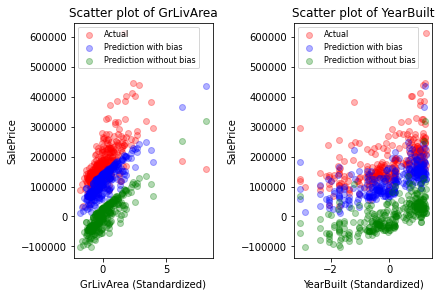

As we can see from this diagram with bias result is close to the actual result while no bias result is far from the actual.
Also the MSE of with bias term is smaller than without bias term result.


In [82]:
#visualization actual SalePrice vs with bias prediction and no bias prediction
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2,constrained_layout=True)
ax1.scatter(X_test[:,0], y_test, color='red', alpha=0.3, label= 'Actual')
ax1.scatter(X_test[:,0], prediction_reg_scratch, color='blue', alpha=0.3, label = 'Prediction with bias')
ax1.scatter(X_test[:,0], prediction_no_bias, color='green', alpha=0.3, label = 'Prediction without bias')
ax1.set_xlabel('GrLivArea (Standardized)')
ax1.set_ylabel('SalePrice')
ax1.set_title('Scatter plot of GrLivArea')
ax1.legend(loc=2, prop={'size': 8})

ax2.scatter(X_test[:,1], y_test, color='red', alpha=0.3, label= 'Actual')
ax2.scatter(X_test[:,1], prediction_reg_scratch, color='blue', alpha=0.3, label = 'Prediction with bias')
ax2.scatter(X_test[:,1], prediction_no_bias, color='green', alpha=0.3, label = 'Prediction without bias')
ax2.set_xlabel('YearBuilt (Standardized)')
ax2.set_ylabel('SalePrice')
ax2.set_title('Scatter plot of YearBuilt')
ax2.legend(loc=2, prop={'size': 8})
plt.show()

print ('As we can see from this diagram with bias result is close to the actual result while no bias result is far from the actual.')
print ('Also the MSE of with bias term is smaller than without bias term result.')

[Problem 9] (Advance task) Multidimensional feature quantity

In [107]:
# use four features instead of two

dataset = pd.read_csv("train.csv")
X = dataset.loc[:, ['GrLivArea', 'YearBuilt', 'MSSubClass', 'LotArea']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

scaler = StandardScaler()
scaler.fit(X_train)
#transform both X_train and X_test
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

#LR in scratch
reg_scratch = ScratchLinearRegression(num_iter=1000, lr=0.01, bias=True, verbose=False)
reg_scratch.fit(X_train, y_train)
prediction_reg_scratch = reg_scratch.predict(X_test)

# LR in scikit-learn
reg = LinearRegression().fit(X_train, y_train)
prediction_reg = reg.predict(X_test)

# Evaluation using MSE
mse_reg_scratch = mean_squared_error(y_test, prediction_reg_scratch)
print ("MSE of ScratchLR: " + str(mse_reg_scratch))

mse_reg = mean_squared_error(y_test, prediction_reg)
print ("MSE of LR: " + str(mse_reg))

print ('MSE is reduced.')

MSE of ScratchLR: 1491090519.4087906
MSE of LR: 1491007129.966586
MSE is reduced.


[Problem 10] (Advance task) Derivation of update formula

The gradient descent (GD) procedure is an algorithm for finding the minimum of a function. In ML, GD is used to find the best parameters that minimize the model's cost function (J). 

Steps to implement Gradient Descent

*   Randomly initialize values

Repeat until iteration reaches given num_iter
*   Update values (theta)

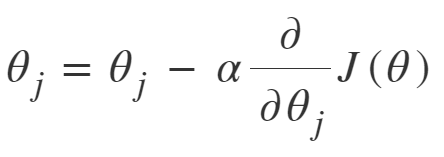

  where J is loss function and alpha is learning rate.




[Problem 11] (Advance task) Problem of local optimum solution